In [7]:
import pandas as pd
ego = pd.read_csv('../packages/issi_data_package/output_files/data/774e7eb6-6ac7-4dd5-9339-531b746cb8ec.csv')
degree1 = pd.read_csv('../packages/issi_data_package/output_files/data/774e7eb6-6ac7-4dd5-9339-531b746cb8ec_nodes.csv')
display(ego,degree1)

,paper_id,year,original_title,authors_display_name,journal_display_name,paper_abstract
0,2294649429,2003,Development of a High Count Rate Readout Syste...,Emmanuel Zervakis|Yannis Papananos|Dimitris Lo...,Journal of Informetrics,NaN
1,2765976477,2017,The hot spot transformation in the research ev...,Ying Chen|Can Wu,Scientometrics,The rapid development of digital technology to...
2,2081133965,1987,In search of influence: The testing of the Ort...,William E. Snizek,Scientometrics,NaN
3,2125355603,1994,Puberty or mid-life crisis,C. Le Pair,Scientometrics,I share the feelings of uneasiness voiced by G...
4,2045322537,1980,Science and science policy in the Arab world,Michael J. Moravcsik,Scientometrics,NaN
5,2034500528,1990,Subject-based publication activity indicators ...,B. M. Gupta|S. C. Sharma|N. N. Mehrotra,Scientometrics,The paper analyses 2339 research papers appear...
6,2009797479,2013,Economic statistics and scientometrics,Cornelis A. van Bochove,Scientometrics,This paper provides scientometricians with a b...
7,2029138605,1983,Statistical reliability of comparisons based o...,András Schubert|Wolfgang Glänzel,Scientometrics,A method for estimating the standard error of ...
8,1765839524,2012,Comments on the Discussion Paper,BraunTibor,Scientometrics,NaN
9,2899270272,2018,A bibliometric method for assessing technologi...,René Lezama-Nicolás|Marisela Rodríguez-Salvado...,Scientometrics,While novel technologies have tremendous compe...


,paper_id,date,journal_id,citation_count,original_title,issue,paper_title,year,first_name,last_name,...,volume,estimated_citation,conference_instance_id,book_title,rank,publisher,created_date,reference_count,conference_series_id,doi
0,2765976477,2017-12-01 00:00:00,1.485614e+08,1,The hot spot transformation in the research ev...,3.0,the hot spot transformation in the research ev...,2017,1307,1324,...,113.0,1,NaN,NaN,19849,Springer Netherlands,2017-11-10,28,NaN,10.1007/s11192-017-2542-4
1,2898340121,2018-11-05 00:00:00,1.836006e+08,0,Through the Looking Glass: made in the library...,9.0,through the looking glass made in the library ...,2018,1,6,...,35.0,0,NaN,NaN,22147,Emerald,2018-11-02,1,NaN,10.1108/lhtn-07-2018-0041
2,2081133965,1987-11-01 00:00:00,1.485614e+08,5,In search of influence: The testing of the Ort...,NaN,in search of influence the testing of the orte...,1987,311,314,...,12.0,5,NaN,NaN,24054,"Akadémiai Kiadó, co-published with Springer Sc...",2016-06-24,7,NaN,10.1007/BF02016670
3,2150499457,2001-01-15 00:00:00,8.011330e+07,157,Authors as citers over time,2.0,authors as citers over time,2001,87,108,...,52.0,281,NaN,NaN,19377,"John Wiley & Sons, Inc.",2016-06-24,68,NaN,10.1002/1097-4571(2000)9999:9999<::AID-ASI1542...
4,2065356234,1996-06-01 00:00:00,1.485614e+08,33,Characteristics and determinants of eminent sc...,2.0,characteristics and determinants of eminent sc...,1996,185,206,...,36.0,55,NaN,NaN,21230,"Akadémiai Kiadó, co-published with Springer Sc...",2016-06-24,40,NaN,10.1007/BF02017313
5,2003265506,1993-01-01 00:00:00,1.485614e+08,8,Measurement of social stratification. A contri...,1.0,measurement of social stratification a contrib...,1993,97,113,...,26.0,8,NaN,NaN,22214,Springer,2016-06-24,23,NaN,10.1007/BF02016795
6,656596637,1999-01-01 00:00:00,NaN,0,Electronic journals and the transformation of ...,NaN,electronic journals and the transformation of ...,1999,NaN,NaN,...,NaN,0,NaN,NaN,26427,UMI,2016-06-24,237,NaN,NaN
7,41496479,2015-09-29 00:00:00,2.051397e+08,14,Secondary and Tertiary Citing: A Study of Refe...,4.0,secondary and tertiary citing a study of refer...,2015,415,434,...,65.0,14,NaN,NaN,22927,University of Chicago Press,2016-06-24,34,NaN,10.1086/602822
8,2125355603,1994-06-01 00:00:00,1.485614e+08,1,Puberty or mid-life crisis,NaN,puberty or mid life crisis,1994,517,520,...,30.0,1,NaN,NaN,25194,"Akadémiai Kiadó, co-published with Springer Sc...",2016-06-24,0,NaN,10.1007/BF02018133
9,1516068682,2001-01-01 00:00:00,1.485614e+08,22,Integrating scientometric indicators into soci...,3.0,integrating scientometric indicators into soci...,2001,411,434,...,52.0,22,NaN,NaN,21433,Kluwer Academic Publishers,2016-06-24,47,NaN,10.1023/A:1014243832084


### Reading the 2nd degree edge list (2nd-degree queires will be enabled in the future)

In [8]:
from pandas import DataFrame
edges = pd.read_csv('../packages/issi_data_package/output_files/data/2ndOrderEdges.csv')
#edges = DataFrame.drop_duplicates(edges)
#edges[['From','To']].to_csv("2ndOrderEdges.csv",index=False)
citations = pd.merge(edges, ego, left_on=['cited'], right_on=['paper_id'], how='inner')
citations.count()
#edges.count()

Unnamed: 0              96137
cited                   96137
citing                  96137
paper_id                96137
year                    96137
original_title          96137
authors_display_name    96137
journal_display_name    96137
paper_abstract          94200
dtype: int64

In [9]:
# direct citations
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict

paper_citing = defaultdict(list)
sum = 0;

citingFile = open("../packages/issi_data_package/output_files/data/2ndOrderEdges.csv", "r")
citingFile.readline()
for line in citingFile:
    line = line.strip().replace('"', '').split(",")
    paper_citing[int(line[1])].append(int(line[0]))
    sum += 1
sum

96137

In [10]:
# cc distribution
temp_list = []
temp_list_1 = []
temp_list_2 = []
paperList = ego['paper_id'].tolist()

for paper in paperList:
    temp_list.append(len(paper_citing[paper]))

for cc in range(1, 10001):
    if cc % 1000 == 0:
        print (str(cc) + " out of 10000 citations have been processed...")
    count = 0
    for item in temp_list:
        if item >= cc:
            count += 1
    temp_list_1.append(count)
    temp_list_2.append(cc)

1000 out of 10000 citations have been processed...
2000 out of 10000 citations have been processed...
3000 out of 10000 citations have been processed...
4000 out of 10000 citations have been processed...
5000 out of 10000 citations have been processed...
6000 out of 10000 citations have been processed...
7000 out of 10000 citations have been processed...
8000 out of 10000 citations have been processed...
9000 out of 10000 citations have been processed...
10000 out of 10000 citations have been processed...


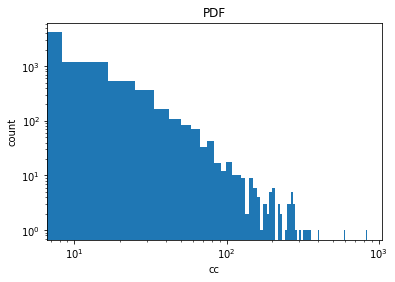

In [11]:
#PDF
plt.hist(temp_list, bins = 100)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("cc")
plt.ylabel("count")
plt.title("PDF")
plt.show()

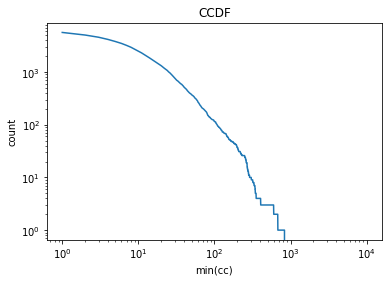

In [12]:
# CCDF
plt.plot(temp_list_2, temp_list_1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("min(cc)")
plt.ylabel("count")
plt.title("CCDF")
plt.show()

In [20]:
# indirect citations
count = 0
tripleCount = 0
total = len(ego)
indirect_citation = defaultdict(list)

for paper in paperList:
    count += 1
    if count % 1000 == 0:
        print("Processed " + str(float(count) / float(total)) + " of total focal papers...\n")
    for citing_paper_1 in paper_citing[paper]:
        for citing_paper_2 in paper_citing[paper]:
            if citing_paper_1 in paper_citing[citing_paper_2]:
                tripleCount += 1
                temp = []
                temp.append(citing_paper_1)
                temp.append(citing_paper_2)
                indirect_citation[paper].append(temp)
tripleCount

Processed 0.14594279042615294 of total focal papers...

Processed 0.29188558085230587 of total focal papers...

Processed 0.43782837127845886 of total focal papers...

Processed 0.5837711617046117 of total focal papers...

Processed 0.7297139521307647 of total focal papers...

Processed 0.8756567425569177 of total focal papers...



0

In [14]:
# cc distribution
itemp_list = []
itemp_list_1 = []
itemp_list_2 = []
idr_list = []
paperList = ego['paper_id'].tolist()

for paper in paperList:
    itemp_list.append(len(indirect_citation[paper]))
    if len(paper_citing[paper]) > 0:
        idr_list.append(len(indirect_citation[paper])/len(paper_citing[paper]))

for cc in range(1, 10001):
    if cc % 1000 == 0:
        print (str(cc) + " out of 10000 citations have been processed...")
    count = 0
    for item in itemp_list:
        if item >= cc:
            count += 1
    itemp_list_1.append(count)
    itemp_list_2.append(cc)

1000 out of 10000 citations have been processed...
2000 out of 10000 citations have been processed...
3000 out of 10000 citations have been processed...
4000 out of 10000 citations have been processed...
5000 out of 10000 citations have been processed...
6000 out of 10000 citations have been processed...
7000 out of 10000 citations have been processed...
8000 out of 10000 citations have been processed...
9000 out of 10000 citations have been processed...
10000 out of 10000 citations have been processed...


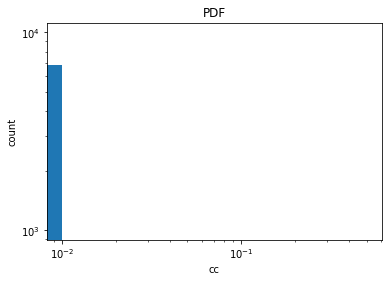

In [15]:
#PDF
plt.hist(itemp_list, bins = 100)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("cc")
plt.ylabel("count")
plt.title("PDF")
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  after removing the cwd from sys.path.


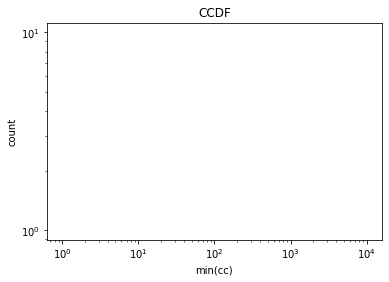

In [16]:
# CCDF
plt.plot(itemp_list_2, itemp_list_1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("min(cc)")
plt.ylabel("count")
plt.title("CCDF")
plt.show()

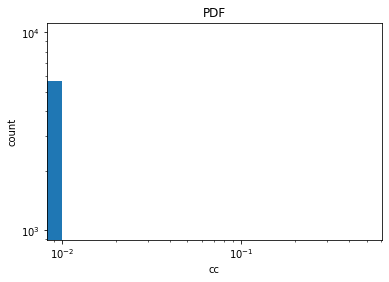

In [17]:
#PDF
plt.hist(idr_list, bins = 100)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("cc")
plt.ylabel("count")
plt.title("PDF")
plt.show()

In [18]:
ego[ego['paper_id'] == 1966024011]

,paper_id,year,original_title,authors_display_name,journal_display_name,paper_abstract
880,1966024011,2015,Field-normalized citation impact indicators us...,Javier Ruiz-Castillo|Ludo Waltman,Journal of Informetrics,We study the problem of normalizing citation i...


In [19]:
oneHop = edges[edges['To'] == 1966024011]
oneHop = oneHop[['To','From']]
oneHop.columns = ["focal","connector"]
twoHops = pd.merge(oneHop, edges, left_on=['connector'], right_on=['To'], how='inner')

oneHop0 = oneHop.copy()
oneHop0.columns = ["cited2","LE"]
ego0 = pd.merge(twoHops, oneHop0, left_on=['focal', 'From'], right_on=["cited2", "LE"], how='inner')
len(ego0)

KeyError: 'To'

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

subgraph = oneHop
ego01 = ego0[["connector","LE"]].copy()
ego01.columns = ["focal","connector"]
subgraph = subgraph.append(ego01)
G = nx.from_pandas_edgelist(subgraph, "focal", "connector")
pos = nx.spring_layout(G)
color_map = []
for node in G:
    if node == 1966024011:
        color_map.append('blue')
    else: color_map.append('red')    
nx.draw(G, node_color = color_map, with_labels=True, pos=pos)
image = plt.show()
display(image)

In [ ]:
len(G)

In [ ]:
ego0